In [1]:
import numpy, h5py, matplotlib
import matplotlib.pyplot as plt
import os
import scipy.signal as sp
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.mlab as mlab
import dipole_fit_scale as dfs

In [24]:
dirs = ['/data/20170511/bead2_15um_QWP/new_sensor_feedback/charge43_whole_points/60.0_74.9_75.4/',
        '/data/20170530/bead7_15um_QWP/dipole_integralXY/',
        '/data/20170530/bead5_15um_QWP/dipoleAC3']
diameters = [16.58, 14.76, 15.37]
file_name = 'ACamplitudes.txt'

In [25]:
def Fw(X, p0, back):
    """fit dipole ac field only at freq w"""
    Eac, g = X
    return p0*Eac*g + back

def F2w(X, g, back):
    """fit dipole ac field only at freq 2w"""
    Eac, alpha = X
    return alpha*(Eac**2)*g + back

def Fwacdc(X, g, p0, back, alpha):
    """fit dipole ac and dc field only at freq w"""
    Eac, Edc = X
    return p0*Eac*g + back + alpha*(2.0*g*Edc*Eac)

def alpha_0(r): # in um
    """alpha0 , r is the radius in um"""
    r1 = 1.0*r/(1e6)
    epsilon0 = 8.854e-12
    return 3.*epsilon0*(2./5.)*(4.*np.pi/3.)*(r1**3)      

def order(A,B,C):
    return zip(*sorted(zip(A,B,C)))

In [26]:
distance = 0.002 #m

Vpp_to_Vamp = 0.5

trek = 200.0 # gain of the trek

for path, diameter in zip(dirs, diameters):
    
    try:
        print path

        F = np.loadtxt(os.path.join(path, file_name))

        Ea = trek*Vpp_to_Vamp*F[0]/distance

        #g = dE/E

        alpha0 = np.ones(len(Ea))*alpha_0(diameter/2)

        Ea_order, force_W_order, force_2W_order = order(Ea, F[1], F[2])

        popt_2W, pcov_2W = curve_fit(F2w, (Ea_order, alpha0), force_2W_order)

        g_from_fit = np.ones(len(Ea))*popt_2W[0]

        popt_W, pcov_W = curve_fit(Fw, (Ea_order, g_from_fit), force_W_order)

    #     alpha0 = alpha_0(7.5) # Nm^3/V^2
    #     g = popt_2W[0] # m^-1
    #     error_g = np.sqrt(pcov_2W[0][0]) # m^-1
        p0 = popt_W[0] # Nm^2/V
    #     background = popt_W[1] # N

    #     print 'Linear and quadratic parameters'
    #     print '    alpha = '+str(alpha0)+' Nm^3/V^2'
    #     print '    g = '+str(g)+' m^-1'
    #     print '    error of g = '+str(error_g)+' m^-1'
        print '    p0 = '+str(p0)+' Nm^2/V'
    #     print '    background = '+str(background)+' N'
    except:
        continue

#     Fw = p0*Eac*g + back               # Nm^2/V * V/m * m^-1 = N
#     F2w = alpha*(Eac**2)*g + back      # Nm^3/V^2 * V/m * V/m * m^-1 = N

#     plt.figure()
#     plt.plot(Ea_order, force_W_order, ".")
#     plt.plot(Ea_order, force_2W_order, ".")
#     plt.plot(Ea_order, Fw((np.array(Ea_order),np.array(g_from_fit)), *popt_W))
#     plt.plot(Ea_order, F2w((np.array(Ea_order),np.array(alpha0)), *popt_2W))

#     plt.ylabel("Force (N)")
#     plt.xlabel("AC field amplitude (V/m)")
#     plt.show()


/data/20170511/bead2_15um_QWP/new_sensor_feedback/charge43_whole_points/60.0_74.9_75.4/
    p0 = 7.98593183161e-22 Nm^2/V
/data/20170530/bead7_15um_QWP/dipole_integralXY/
    p0 = 2.81631005549e-21 Nm^2/V
/data/20170530/bead5_15um_QWP/dipoleAC3
    p0 = 1.17935071024e-21 Nm^2/V


In [15]:
# other_path = '/data/20170511/bead2_15um_QWP/new_sensor_feedback/charge43_whole_points/100.0_74.9_75.4/'
path = '/data/20170530/bead7_15um_QWP/dipole_integralXY/'
F = np.loadtxt(os.path.join(path, file_name))
Ea = trek*Vpp_to_Vamp*F[0]/distance
Ed =  trek*Vpp_to_Vamp*0.1/distance
#g = dE/E
alpha0 = np.ones(len(Ea))*alpha_0(7.5)
Ea_order, force_W_order, force_2W_order = order(Ea, F[1], F[2])
popt_2W, pcov_2W = curve_fit(F2w, (Ea_order, alpha0), force_2W_order)
g_from_fit = np.ones(len(Ea))*popt_2W[0]
popt_W, pcov_W = curve_fit(Fw, (Ea_order, g_from_fit), force_W_order)


alpha0 = alpha_0(7.5) # Nm^3/V^2
g = popt_2W[0] # m^-1
error_g = np.sqrt(pcov_2W[0][0]) # m^-1
p0 = popt_W[0] # Nm^2/V
background = popt_W[1] # N

print 'Linear and quadratic parameters'
print '    alpha      =  '+str(alpha0)+' Nm^3/V^2'
print '    g          =  '+str(g)+' m^-1'
print '    error of g =  '+str(error_g)+' m^-1'
print '    p0         =  '+str(p0)+' Nm^2/V'
print '    background = '+str(background)+' N'

Linear and quadratic parameters
    alpha      =  1.87755714145e-26 Nm^3/V^2
    g          =  3.85920055582 m^-1
    error of g =  0.0215455335378 m^-1
    p0         =  2.95593700643e-21 Nm^2/V
    background = -8.27764182159e-17 N


<IPython.core.display.Javascript object>


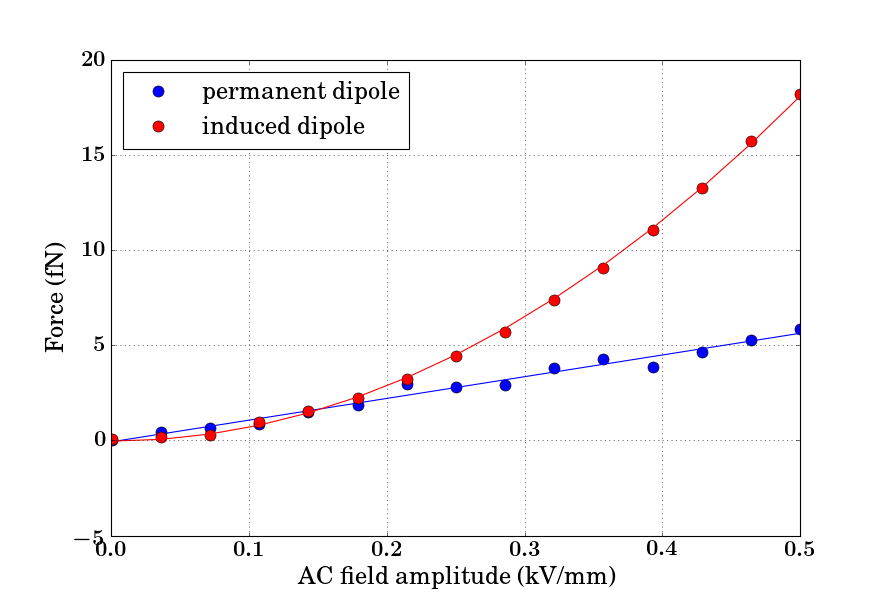

In [17]:
import matplotlib
%matplotlib notebook

plt.rc('text', usetex=True)
#plt.rc('font', family='serif')
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 20}
matplotlib.rc('font', **font)
matplotlib.rcParams['text.latex.preamble'] = [r'\boldmath']

electric_field   = np.array(Ea_order)/1e6
dipole_force     = 1e15*np.array(force_W_order)
dipole_fit       = 1e15*Fw((np.array(Ea_order),np.array(g_from_fit)), *popt_W)
ind_dipole_force = 1e15*np.array(force_2W_order)
ind_dipole_fit   = 1e15*F2w((np.array(Ea_order),np.array(alpha0)), *popt_2W)

plt.plot(electric_field, dipole_force,     "bo", markersize=10, label='permanent dipole')
plt.plot(electric_field, dipole_fit,       'b-')
plt.plot(electric_field, ind_dipole_force, "ro", markersize=10, label='induced dipole')
plt.plot(electric_field, ind_dipole_fit,   'r-')

plt.ylabel("Force (fN)", size=22)
plt.xlabel("AC field amplitude (kV/mm)", size=22)
plt.legend(prop={'size': 22}, numpoints=1, loc=2)

plt.grid()
plt.show()

In [ ]:
# change to fN vs kV/mm
# only one dot in legend

In [8]:
Ea_order/1e6

TypeError: unsupported operand type(s) for /: 'tuple' and 'float'

In [ ]:
1.8449508 e cm (electron centimeters)